In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from scipy import interpolate
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
# # inspired by http://nipunbatra.github.io/2014/08/latexify/
# params = {
#     'text.latex.preamble': ['\\usepackage{gensymb}'],
#     'image.origin': 'lower',
#     'image.interpolation': 'nearest',
#     'image.cmap': 'gray',
#     'axes.grid': False,
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
#     'axes.labelsize': 8, # fontsize for x and y labels (was 10)
#     'axes.titlesize': 8,
#     'font.size': 8, # was 10
#     'legend.fontsize': 6, # was 10
#     'xtick.labelsize': 8,
#     'ytick.labelsize': 8,
#     'text.usetex': True,
#     'figure.figsize': [3.39, 2.10],
#     'font.family': 'serif',
# }
# matplotlib.rcParams.update(params)

## Hybrid

In [23]:
def plot_profile(file,xlim,ylim,thesize):
    data=pd.read_csv(file,sep="\s+",names=["lon","lat","dep","val","x"])
    x=data.x.values
    y=data.dep.values
    z=data.val.values
    z[z==-1000.0]=np.nan
    
    plt.figure(figsize=(18,9))
    plt.scatter(x,y,c=z,s=thesize,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    plt.gca().invert_yaxis()
    plt.xlim(0,xlim)
    plt.ylim(ylim,0)
    plt.show()
    
    ref=pd.read_csv("./STW105.txt",sep="\s+",names=["radius","density","vpv","vsv","kappa","miu","vph","vsh","eta"])    
    f = interpolate.interp1d((6371000.0-ref.radius)/1000, ref.vsh/1000.0)
    
    z=data.val.values/f(y)
    z[z<0]=0
    z[np.isnan(z)]=0
    z[z==-1000.0]=np.nan
    z=(z-1)
    z[z==-1]=0
    
    plt.figure(figsize=(18,9))
    plt.scatter(x,y,c=z,s=thesize,cmap=plt.cm.seismic)
    plt.colorbar() # draw colorbar
    plt.gca().invert_yaxis()
    plt.xlim(0,xlim)
    plt.ylim(ylim,0)
    plt.show()

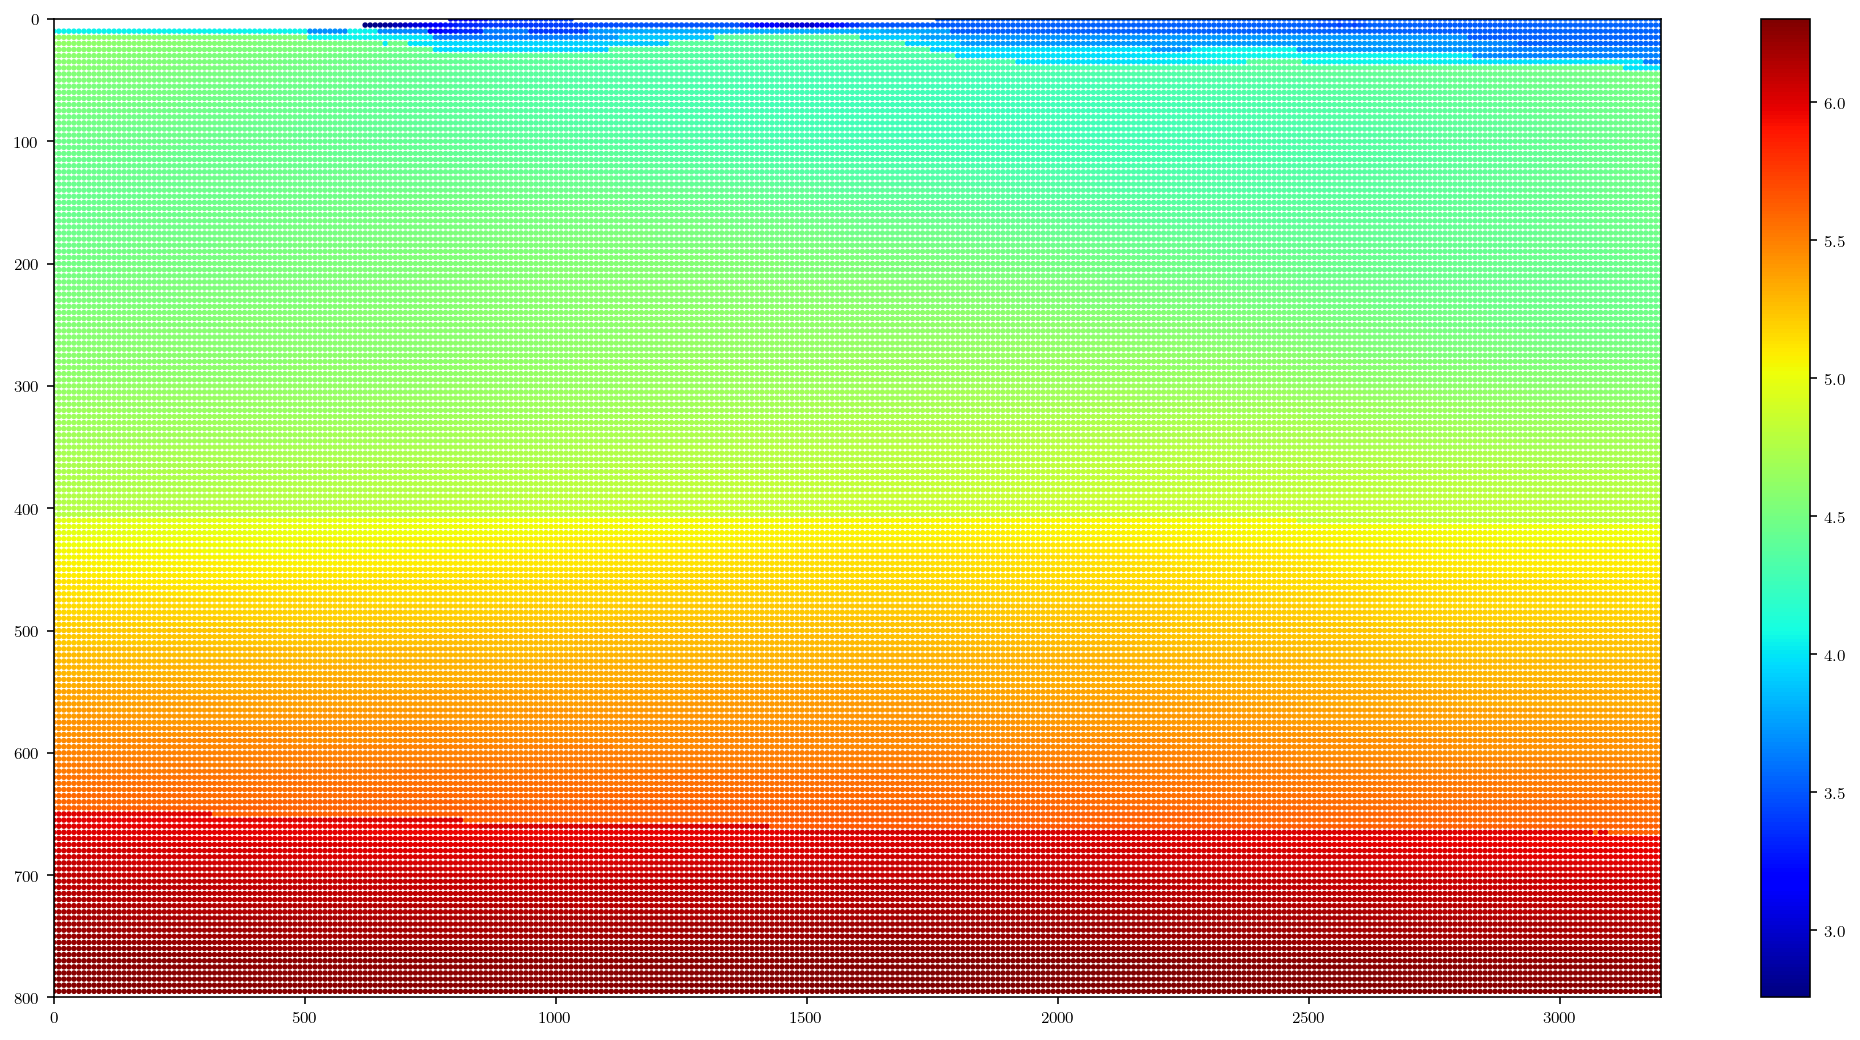

/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


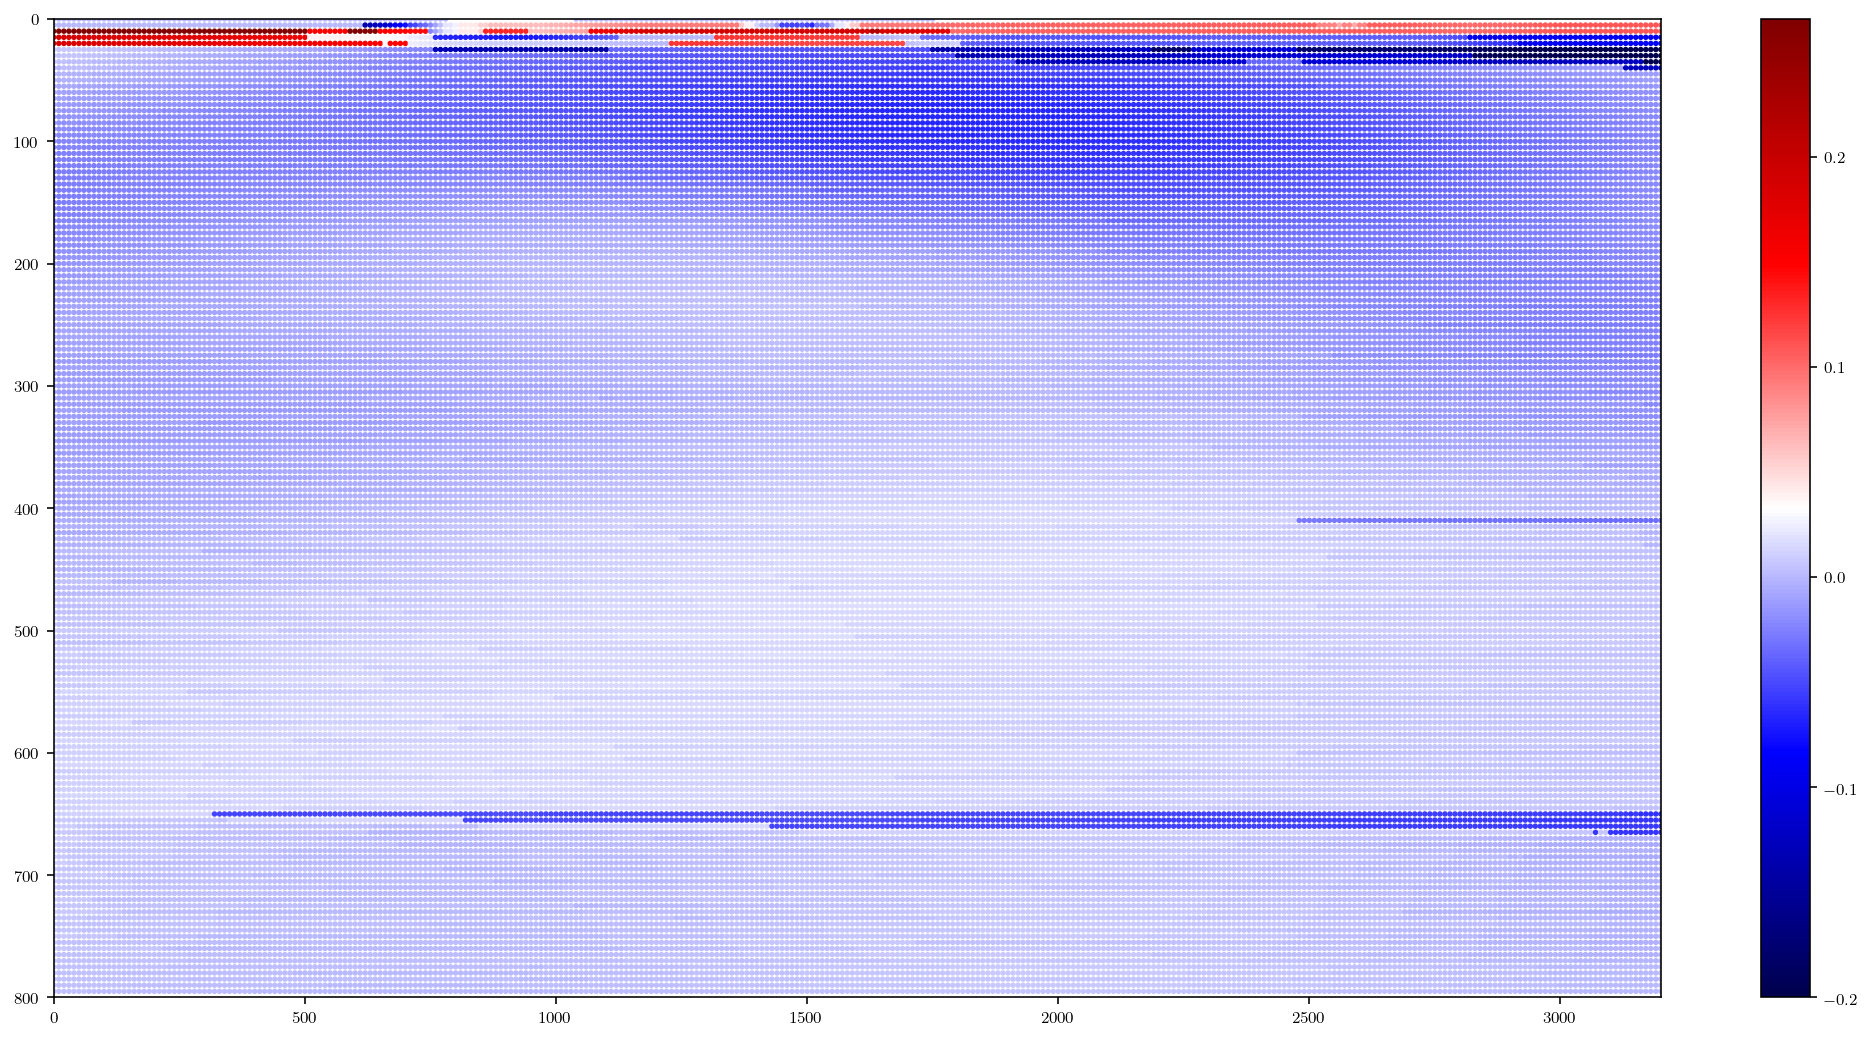

In [24]:
plot_profile("./ver_hresvs_vs_gmt",3200,800,3)

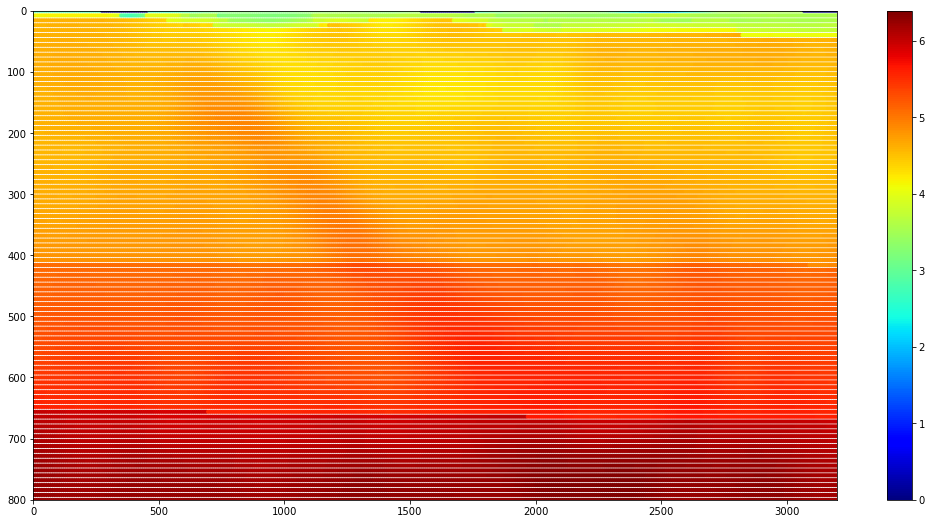

/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/ziyixi/anaconda3/envs/seismology/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


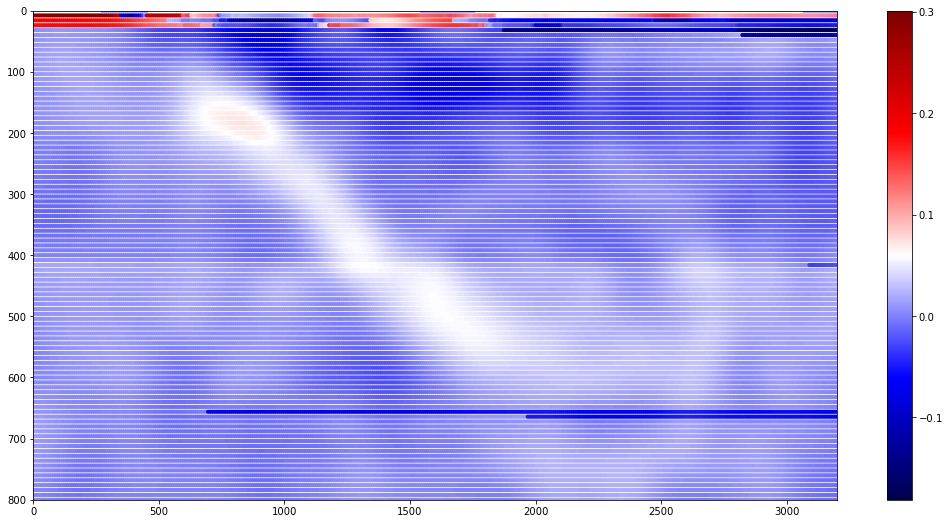

In [16]:
plot_profile("./vsh_line1_interp",3200,800,10)